In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("../resources/cardio_train.csv", sep=";")
df["age"] = (df["age"] /
             365).round()  # возраст в годах с округлением до целого
df["height"] = df["height"] / 100  # рост в метрах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  float64
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  float64
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 6.9 MB


1. Определите количество мужчин и женщин среди испытуемых. Обратите внимание, что способ кодирования переменной gender мы не знаем. Воспользуемся медицинским фактом, а именно: мужчины в среднем выше женщин.

In [3]:
people = df["gender"].value_counts()
people

1    45530
2    24470
Name: gender, dtype: int64

In [4]:
df.pivot_table(values=["height"], index=["gender"], aggfunc="mean")

,height
gender,
1,1.613556
2,1.699479


1Ж > 2М

Верно ли, что мужчины более склонны к употреблению алкоголя, чем женщины?

In [5]:
df["alco"].value_counts()

0    66236
1     3764
Name: alco, dtype: int64

In [6]:
pd.crosstab(df["gender"], df["alco"])

alco,0,1
gender,,
1,44369,1161
2,21867,2603


2М"alco">1Ж"alco"
при этом женщин опрошено в 2 раза больше

2. Каково различие между процентами курящих мужчин и женщин?

In [7]:
pd.crosstab(df["gender"], df["smoke"])

smoke,0,1
gender,,
1,44717,813
2,19114,5356


In [8]:
df_smoke = df[df["smoke"] == 1].copy()  # df с курящими

In [9]:
df_smoke_w = df_smoke.drop(
    df_smoke[(df_smoke["gender"] == 2)].index)  # df с курящими Ж

In [10]:
df_smoke_m = df_smoke.drop(
    df_smoke[(df_smoke["gender"] == 1)].index)  # df с курящими М

In [11]:
df_smoke["gender"].value_counts(normalize=True)  # процентное соотношение

2    0.868212
1    0.131788
Name: gender, dtype: float64

Какова разница между средними значениями возраста для курящих и некурящих?

In [12]:
df.groupby("smoke")["age"].mean()

smoke
0    53.439395
1    52.296645
Name: age, dtype: float64

Создайте новый признак --- BMI (body mass index, индекс массы тела). Для этого разделите вес в килограммах на квадрат роста в метрах. Считается, что нормальные значения ИМТ составляют от 18.5 до 25.

In [13]:
df["BMI"] = df["weight"] / (df["height"].pow(2))

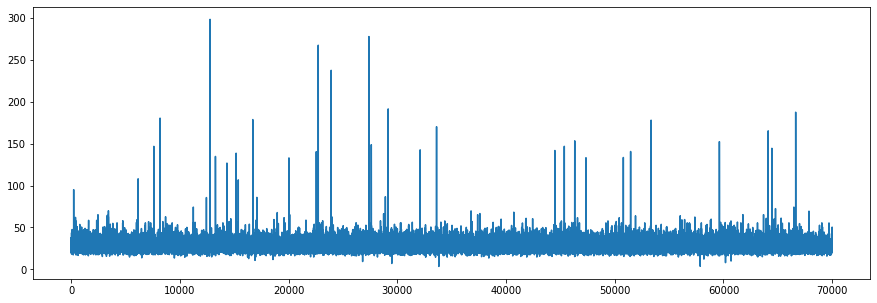

In [14]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(df["BMI"])

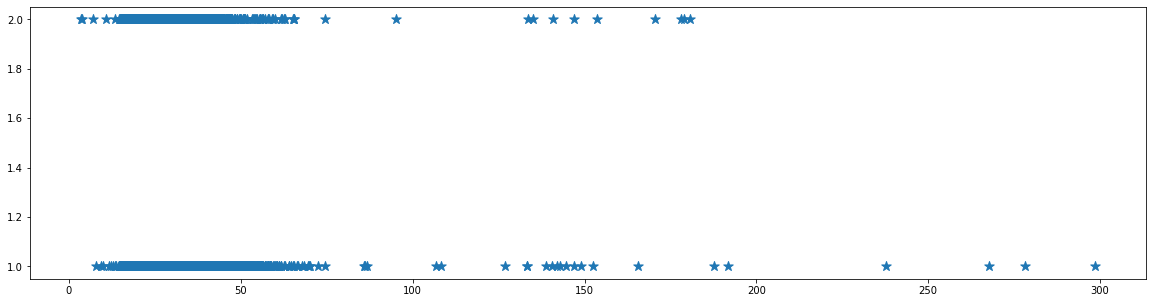

In [15]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.scatter(df["BMI"], df["gender"], marker="*", s=100)

 Выберите верные утверждения:

(a) Средний ИМТ находится в диапазоне нормальных значений ИМТ.

(b) ИМТ для женщин в среднем выше, чем для мужчин.

(c) У здоровых людей в среднем более высокий ИМТ, чем у людей с ССЗ.

(d) Для здоровых непьющих мужчин ИМТ ближе к норме, чем для здоровых непьющих женщин

In [16]:
df["BMI"].mean()  # средний ИМТ выше нормального

27.55651255127886

In [17]:
df.groupby(
    "gender")["BMI"].mean()  # ИМТ для женщин в среднем выше, чем для мужчин

gender
1    27.987583
2    26.754442
Name: BMI, dtype: float64

In [18]:
df.groupby("cardio")["BMI"].mean(
)  # У здоровых людей в среднем более низкий ИМТ, чем у людей с ССЗ

cardio
0    26.548175
1    28.566061
Name: BMI, dtype: float64

In [19]:
# df.groupby("gender"&"cardio"&"alco")["BMI"].mean()

In [20]:
df.pivot_table(values=["BMI"],
               index=["gender", "alco", "cardio"],
               aggfunc="mean")
# У здоровых непьющих мужчин ИМТ ближе к норме, чем у здоровых непьющих женщин

BMI
gender alco cardio           
1      0    0       26.845407
            1       29.052771
       1    0       28.671457
            1       30.812347
2      0    0       25.872638
            1       27.522450
       1    0       26.097220
            1       28.226569

Удалите пациентов, у которых диастолическое давление выше систолического. Какой процент от общего количества пациентов они составляли? (систолическое/диастолическое — 120 и 80 мм рт. ст.)

In [21]:
(df["ap_hi"] < df["ap_lo"]).value_counts()

False    68766
True      1234
dtype: int64

In [22]:
(df["ap_hi"] < df["ap_lo"]).value_counts(
    normalize=True)  # 1.7 процента от общего количества пациентов

False    0.982371
True     0.017629
dtype: float64

In [23]:
df_clean = df.drop(df[df["ap_hi"] < df["ap_lo"]].index)

In [24]:
df_clean

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50.0,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55.0,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52.0,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48.0,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48.0,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,2,1.68,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,62.0,1,1.58,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,52.0,2,1.83,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,61.0,1,1.63,72.0,135,80,1,2,0,0,0,1,27.099251


In [25]:
# "gender"&"smoke"&"age"&"ap_hi"&"cholesterol" - "cardio"

In [26]:
age_categories = {}

counter = 1
age_category = 5
for age in range(1, 70):
    age_categories[age] = age_category
    
    if (counter == 5):
        counter = 0
        age_category += 5
        
    counter += 1
    
age_categories

{1: 5,
 2: 5,
 3: 5,
 4: 5,
 5: 5,
 6: 10,
 7: 10,
 8: 10,
 9: 10,
 10: 10,
 11: 15,
 12: 15,
 13: 15,
 14: 15,
 15: 15,
 16: 20,
 17: 20,
 18: 20,
 19: 20,
 20: 20,
 21: 25,
 22: 25,
 23: 25,
 24: 25,
 25: 25,
 26: 30,
 27: 30,
 28: 30,
 29: 30,
 30: 30,
 31: 35,
 32: 35,
 33: 35,
 34: 35,
 35: 35,
 36: 40,
 37: 40,
 38: 40,
 39: 40,
 40: 40,
 41: 45,
 42: 45,
 43: 45,
 44: 45,
 45: 45,
 46: 50,
 47: 50,
 48: 50,
 49: 50,
 50: 50,
 51: 55,
 52: 55,
 53: 55,
 54: 55,
 55: 55,
 56: 60,
 57: 60,
 58: 60,
 59: 60,
 60: 60,
 61: 65,
 62: 65,
 63: 65,
 64: 65,
 65: 65,
 66: 70,
 67: 70,
 68: 70,
 69: 70}

In [27]:
ap_categories = {}

counter = 1
ap_category = 10
for ap in range(1, 3000):
    ap_categories[ap] = ap_category
    
    if (counter == 10):
        counter = 0
        ap_category += 10
        
    counter += 1

In [28]:
df["ap_com"] = df["ap_hi"].map(ap_categories)

In [29]:
new_age = {
    40.0: 45,
    41.0: 45,
    42.0: 45,
    43.0: 45,
    44.0: 45,
    45.0: 45,
    39.0: 40,
    30.0: 35,
    46.0: 50,
    47.0: 50,
    48.0: 50,
    49.0: 50,
    50.0: 50,
    51.0: 55,
    52.0: 55,
    53.0: 55,
    54.0: 55,
    55.0: 55,
    56.0: 60,
    57.0: 60,
    58.0: 60,
    59.0: 60,
    60.0: 60,
    61.0: 65,
    62.0: 65,
    63.0: 65,
    64.0: 65,
    65.0: 65
}
df["age_com"] = df["age"].map(age_categories)
# группировка возраста

In [30]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,ap_com,age_com
0,0,50.0,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120,110.0,50
1,1,55.0,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679,140.0,55
2,2,52.0,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805,130.0,55
3,3,48.0,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479,150.0,50
4,4,48.0,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177,100.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,2,1.68,76.0,120,80,1,1,1,0,1,0,26.927438,120.0,55
69996,99995,62.0,1,1.58,126.0,140,90,2,2,0,0,1,1,50.472681,140.0,65
69997,99996,52.0,2,1.83,105.0,180,90,3,1,0,1,0,1,31.353579,180.0,55
69998,99998,61.0,1,1.63,72.0,135,80,1,2,0,0,0,1,27.099251,140.0,65


In [31]:
df["age_com"].value_counts()

60    20005
55    15544
50    13229
65    10435
45     7674
40     3109
30        4
Name: age_com, dtype: int64

In [32]:
df_ap = df.drop(df[(df["ap_hi"] > 180) | (df["ap_hi"] < 50)].index)
df_ap.shape[0] / df.shape[0]
# расчет и удаление выбросов

0.9920428571428571

In [33]:
df_ap["ap_hi"].value_counts()

120    27699
140     9506
130     8961
110     8644
150     4450
       ...  
177        2
96         2
97         1
60         1
93         1
Name: ap_hi, Length: 91, dtype: int64

In [34]:
df_ap.pivot_table(values=["smoke"],
                  index=["gender","age_com","ap_com","cardio","cholesterol"])

smoke
gender age_com ap_com cardio cholesterol          
1      30      110.0  0      1            0.000000
               120.0  0      1            0.000000
       40      70.0   0      1            0.000000
               80.0   0      1            0.000000
                             2            0.000000
...                                            ...
2      65      180.0  0      1            0.333333
                             3            0.000000
                      1      1            0.321429
                             2            0.277778
                             3            0.250000

[723 rows x 1 columns]

Визуализируйте распределение уровня холестерина для различных возрастных категорий.

<AxesSubplot:xlabel='count', ylabel='age_com'>

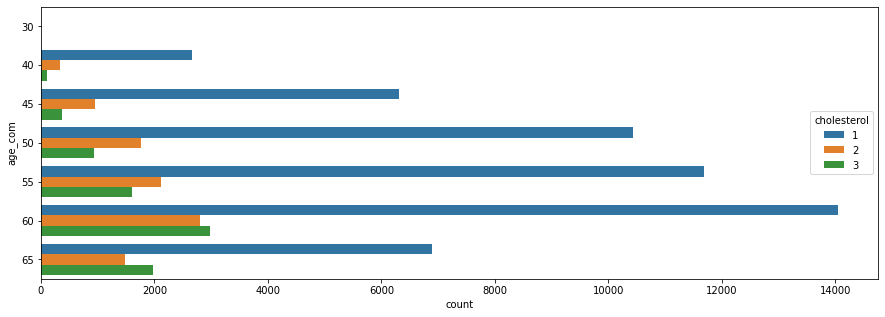

In [35]:
plt.figure(figsize=(15, 5))
sns.countplot(y="age_com", hue="cholesterol", data=df_ap)

Как распределена переменная BMI? Есть ли выбросы?

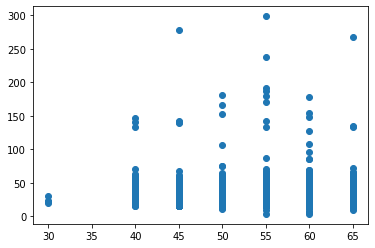

In [36]:
plt.scatter(df_ap["age_com"], df_ap["BMI"]);

In [37]:
df_ap_clean = df_ap.drop(df_ap[(df_ap["BMI"] > 70)].index)
df_ap_clean.shape[0] / df_ap.shape[0]

0.9995103898161082

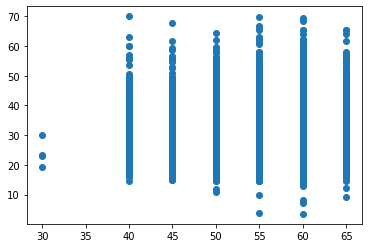

In [38]:
plt.scatter(df_ap_clean["age_com"], df_ap_clean["BMI"]);

Как соотносятся ИМТ и наличие ССЗ? Придумайте подходящую визуализацию.

In [39]:
df_ap_clean

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,ap_com,age_com
0,0,50.0,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120,110.0,50
1,1,55.0,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679,140.0,55
2,2,52.0,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805,130.0,55
3,3,48.0,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479,150.0,50
4,4,48.0,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177,100.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,2,1.68,76.0,120,80,1,1,1,0,1,0,26.927438,120.0,55
69996,99995,62.0,1,1.58,126.0,140,90,2,2,0,0,1,1,50.472681,140.0,65
69997,99996,52.0,2,1.83,105.0,180,90,3,1,0,1,0,1,31.353579,180.0,55
69998,99998,61.0,1,1.63,72.0,135,80,1,2,0,0,0,1,27.099251,140.0,65


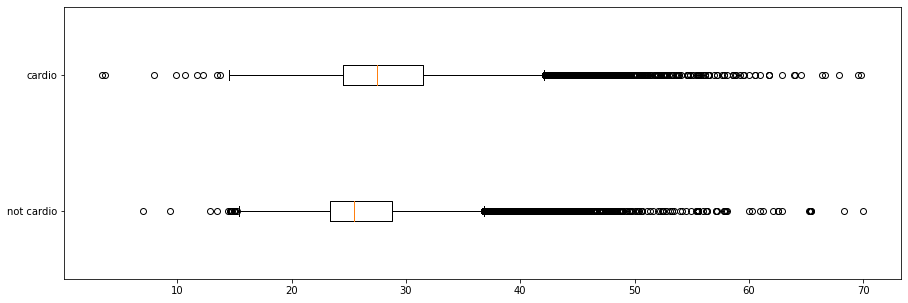

In [40]:
cardio_true = df_ap_clean[df_ap_clean["cardio"] == 1]
cardio_not = df_ap_clean[df_ap_clean["cardio"] == 0]
fig, ax = plt.subplots(figsize=(15, 5))
plt.boxplot([cardio_not["BMI"], cardio_true["BMI"]],vert=False,labels=["not cardio", "cardio"]);